# Monte Carlo Simulation 

## Question 7.1 - Buffon's Needle Method(Area Estimation)

value of integrak is: -6.092313907686092
error is: 0.015385651281015397


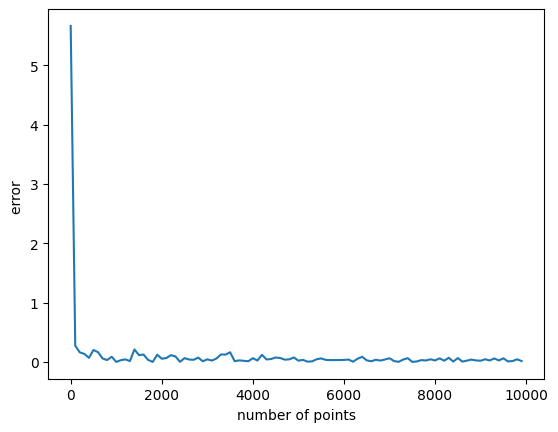

In [63]:
import numpy as np
import matplotlib.pyplot as plt

real_value = -6      # The expected true value of the integral 
y_max = 20           # Upper limit for y in the sampling box
N_s = 0              # Counter for successful samples
N = 10000            # Total number of sample points
A, B = [], []        # Lists to store error and sample size

# Loop over different sample sizes (from 1 to 10000 in steps of 100)
for j in range(1, N, 100):
    N_s = 0
    # First integral estimation 
    for i in range(j):
        x = np.random.randint(0, 2) + np.random.rand()   # Random x in [0, 2)
        y = np.random.randint(0, y_max) + np.random.rand()  # Random y in [0, 20)
        if x**3 > y:
            N_s += 1
    int_1 = 2 * 20 * N_s / j   # Estimate for first integral (area = width * height * ratio)

    N_s = 0
    # Second integral estimation 
    for i in range(j):
        x = np.random.randint(0, 2) + np.random.rand()
        y = np.random.randint(0, y_max) + np.random.rand()
        if x * 5 > y:
            N_s += 1
    int_2 = 2 * 20 * N_s / j   # Estimate for second integral

    # Append relative error to A, and sample size to B
    A.append(abs(int_1 - int_2 + 6) / 6)   # Relative error based on expected value = -6
    B.append(j)

# Print final estimated integral and error
print("value of integrak is:", int_1 - int_2)
print("error is:", abs(int_1 - int_2 + 6) / 6)

# Plot error vs. number of sample points
plt.plot(B, A)
plt.xlabel("number of points")  
plt.ylabel("error ")  
plt.show()


## Question 7.2 - Simple & Smart Sampling

### simple sampling

In [64]:
import numpy as np 
import matplotlib.pyplot as plt
import time

# Start tracking execution time
start_time = time.time()

# Initializing variables for averaging f(x) and f(x)^2
f_average = 0
f2_average = 0

# Number of samples
N = 10000

# Monte Carlo integration loop
for i in range(N):
    x = np.random.randint(0, 2) + np.random.rand()  # Random x in [0, 2)
    f_average += np.e**(-x**2)  # Sum of the function values: f(x) = e^(-x^2)
    f2_average += (np.e**(-x**2))**2  # Sum of squared function values

# Estimating the integral using the simple method (Monte Carlo)
simple_method = f_average * 2 / N  # Multiply by the width (2) and average

# True value of the integral 
real_value = 0.8820813907624217

# Calculate the relative error of the simple method estimate
real_error = abs((simple_method - real_value) / real_value)

# Calculate the analytic error using the variance formula for Monte Carlo
analytic_error = np.sqrt(abs(f2_average / N - (simple_method / 2)**2))

# Print results
print("real_value= ", real_value)  # Exact value of the integral
print("simple_method= ", simple_method)  # Estimated value using the simple method
print("real_error= ", real_error)  # Relative error between the estimated and real values
print("analytic_error= ", analytic_error / np.sqrt(N))  # Normalized analytic error

# End tracking execution time
end_time = time.time()

# Print the time it took to run the program
print(f"Runtime: ", end_time - start_time, "seconds")


real_value=  0.8820813907624216
simple_method=  0.892350570116059
real_error=  0.011641986171776345
analytic_error=  0.00342759839561814
Runtime:  0.038266658782958984 seconds


### smart sampling

## Question 7.3 - Multiple Integral (Finding the center of mass of a sphere)

In [65]:
import numpy as np 
import matplotlib.pyplot as plt

# Initialize variables
f_average = 0   # Sum of the function values for calculating the integral
R = 1           # Radius of sphere
N = 10000       # Number of random samples

# First Monte Carlo estimation loop
for i in range(N):
    # Random sampling for x in the range [-R, R]
    x = np.random.randint(-R, R) + np.random.rand()  # Uniform random sample in [-R, R]
    
    # Function to be integrated: f(x) = x^2 + 3Rx
    f_average += x**2 + 3 * R * x

# Estimate the integral using Monte Carlo, multiplying by the width of the integration range (2R)
simple_method = f_average * 2 * R / N

# Second Monte Carlo estimation loop (for mass)
f_average2 = 0
for i in range(N):
    # Random sampling for x in the range [-R, R]
    x = np.random.randint(-R, R) + np.random.rand()  # Uniform random sample in [-R, R]
    
    # Function for normalizing the integral (x+3R)
    f_average2 += x+3*R

simple2_method = f_average2 * 8 * R**3 / N

# Calculate the center of mass in z-direction (the ratio of the two estimates)
z_center = simple_method / simple2_method

# Since the problem seems to be symmetric, we assume x_center and y_center are zero
print("z_center= ", z_center)  # Output the center of mass in the z-direction
print("x_center= ", 0)         # The x-center is zero due to symmetry
print("y_center= ", 0)         # The y-center is zero due to symmetry


z_center=  0.02616593545436269
x_center=  0
y_center=  0
